# Exploratory Data Analysis - Assignment

## 🔍 Overview
This lab is designed to help you practice exploratory data analysis using Python. You will work with some housing data for the state of California. You will use various data visualization and analysis techniques to gain insights and identify patterns in the data, and clean and preprocess the data to make it more suitable for analysis. The lab is divided into the following sections:

- Data Loading and Preparation
- Data Visualization
- Data Cleaning and Preprocessing (using visualizations)

## 🎯 Objectives
This assignment assess your ability to:
- Load and pre-process data using `pandas`
- Clean data and preparing it for analysis
- Use visualization techniques to explore and understand the data
- Use visualization techniques to identify patterns and relationships in the data
- Use visualization to derive insights from the data
- Apply basic statistical analysis to derive insights from the data
- Communicate your findings through clear and effective data visualizations and summaries

#### Package Imports
We will keep coming back to this cell to add "import" statements, and configure libraries as we need

In [4]:
# Common imports
import numpy as np
import pandas as pd
from scipy.stats import trim_mean

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

## Housing Data in California

### Task 1:  Load the dataset
The dataset is available in the `data/housing.csv` file. Check the file to determine the delimiter and/or the appropriate pandas method to use to load the data.

Make sure you name the variable `housing` and that you use the appropriate pandas method to load the data.

In [5]:
# 💻 Import the dataset in the project (data/housing.csv) into a dataframe called (housing)

#Load the dataset
housing = pd.read_csv("data/housing.csv")

#Display the first few rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Task 2: Confirm the data was loaded correctly

#### 2.1: Get the first 6 records of the dataset

In [6]:
# 💻 Get the first 6 records of the dataframe
housing.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


#### 2.2: Get the last 7 records of the dataset

In [7]:
# 💻 Get the last 7 records of the dataframe

housing.tail(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


#### 2.3: Get a random sample of 10 records

In [8]:
# 💻 Get a random 10 records of the dataframe

housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20282,-119.18,34.19,36.0,4519.0,1081.0,4818.0,1061.0,2.8561,179100.0,NEAR OCEAN
11676,-118.00,33.85,33.0,2053.0,418.0,1154.0,405.0,4.0455,197200.0,<1H OCEAN
10393,-117.65,33.59,8.0,2649.0,340.0,1238.0,354.0,8.0409,337900.0,<1H OCEAN
11454,-118.01,33.67,16.0,3581.0,780.0,1644.0,774.0,5.0410,397600.0,NEAR OCEAN
18962,-122.05,38.26,21.0,7195.0,1416.0,3927.0,1377.0,3.0912,126300.0,INLAND
8346,-118.32,33.94,38.0,1067.0,170.0,499.0,169.0,4.6389,183800.0,<1H OCEAN
12904,-121.34,38.61,11.0,1716.0,404.0,722.0,415.0,2.0926,166100.0,INLAND
7343,-118.14,33.96,38.0,590.0,139.0,620.0,132.0,2.1731,143800.0,<1H OCEAN
11161,-118.01,33.83,23.0,1086.0,268.0,825.0,250.0,2.4609,219600.0,<1H OCEAN
14466,-117.24,32.82,20.0,2467.0,332.0,731.0,335.0,7.2559,392300.0,NEAR OCEAN


#### 2.4: Get information about the dataset, including the number of rows, number of columns, column names, and data types of each column

In [9]:
# 💻 Show information about the different data columns (columns, data types, ...etc.)

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> 🚩 This is a good point to commit your code to your repository.

### Task 3: Understand the data types
For each of the 10 columns, Identify the data type: (Numerical-Continuous, Numerical-Discrete, Categorical-Ordinal, Categorical-nominal )

<details>
<summary>Click here for the data type diagram</summary>

  ![Data types](https://miro.medium.com/max/1400/1*kySPZcf83qLOuaqB1vJxlg.jpeg)
</details>

> 🚩 This is a good point to commit your code to your repository.

### Task 4: Understand the data
#### 4.1: Get the summary statistics for the numerical columns

In [10]:
# 💻 Show the descriptive statistics information about the columns in the data frame

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 4.2: For the categorical columns, get the frequency counts for each category

<details>
  <summary>🦉 Hints</summary>

  - Use the `value_counts()` method on the categorical columns
</details>

In [11]:
# 💻 Show the frequency of the values in the ocean_proximity column

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

> 🚩 This is a good point to commit your code to your repository.

### Task 5: Visualize the data

#### 5.1: Visualize the distribution of the numerical columns
In a single figure, plot the histograms for all the numerical columns. Use a bin size of 50 for the histograms

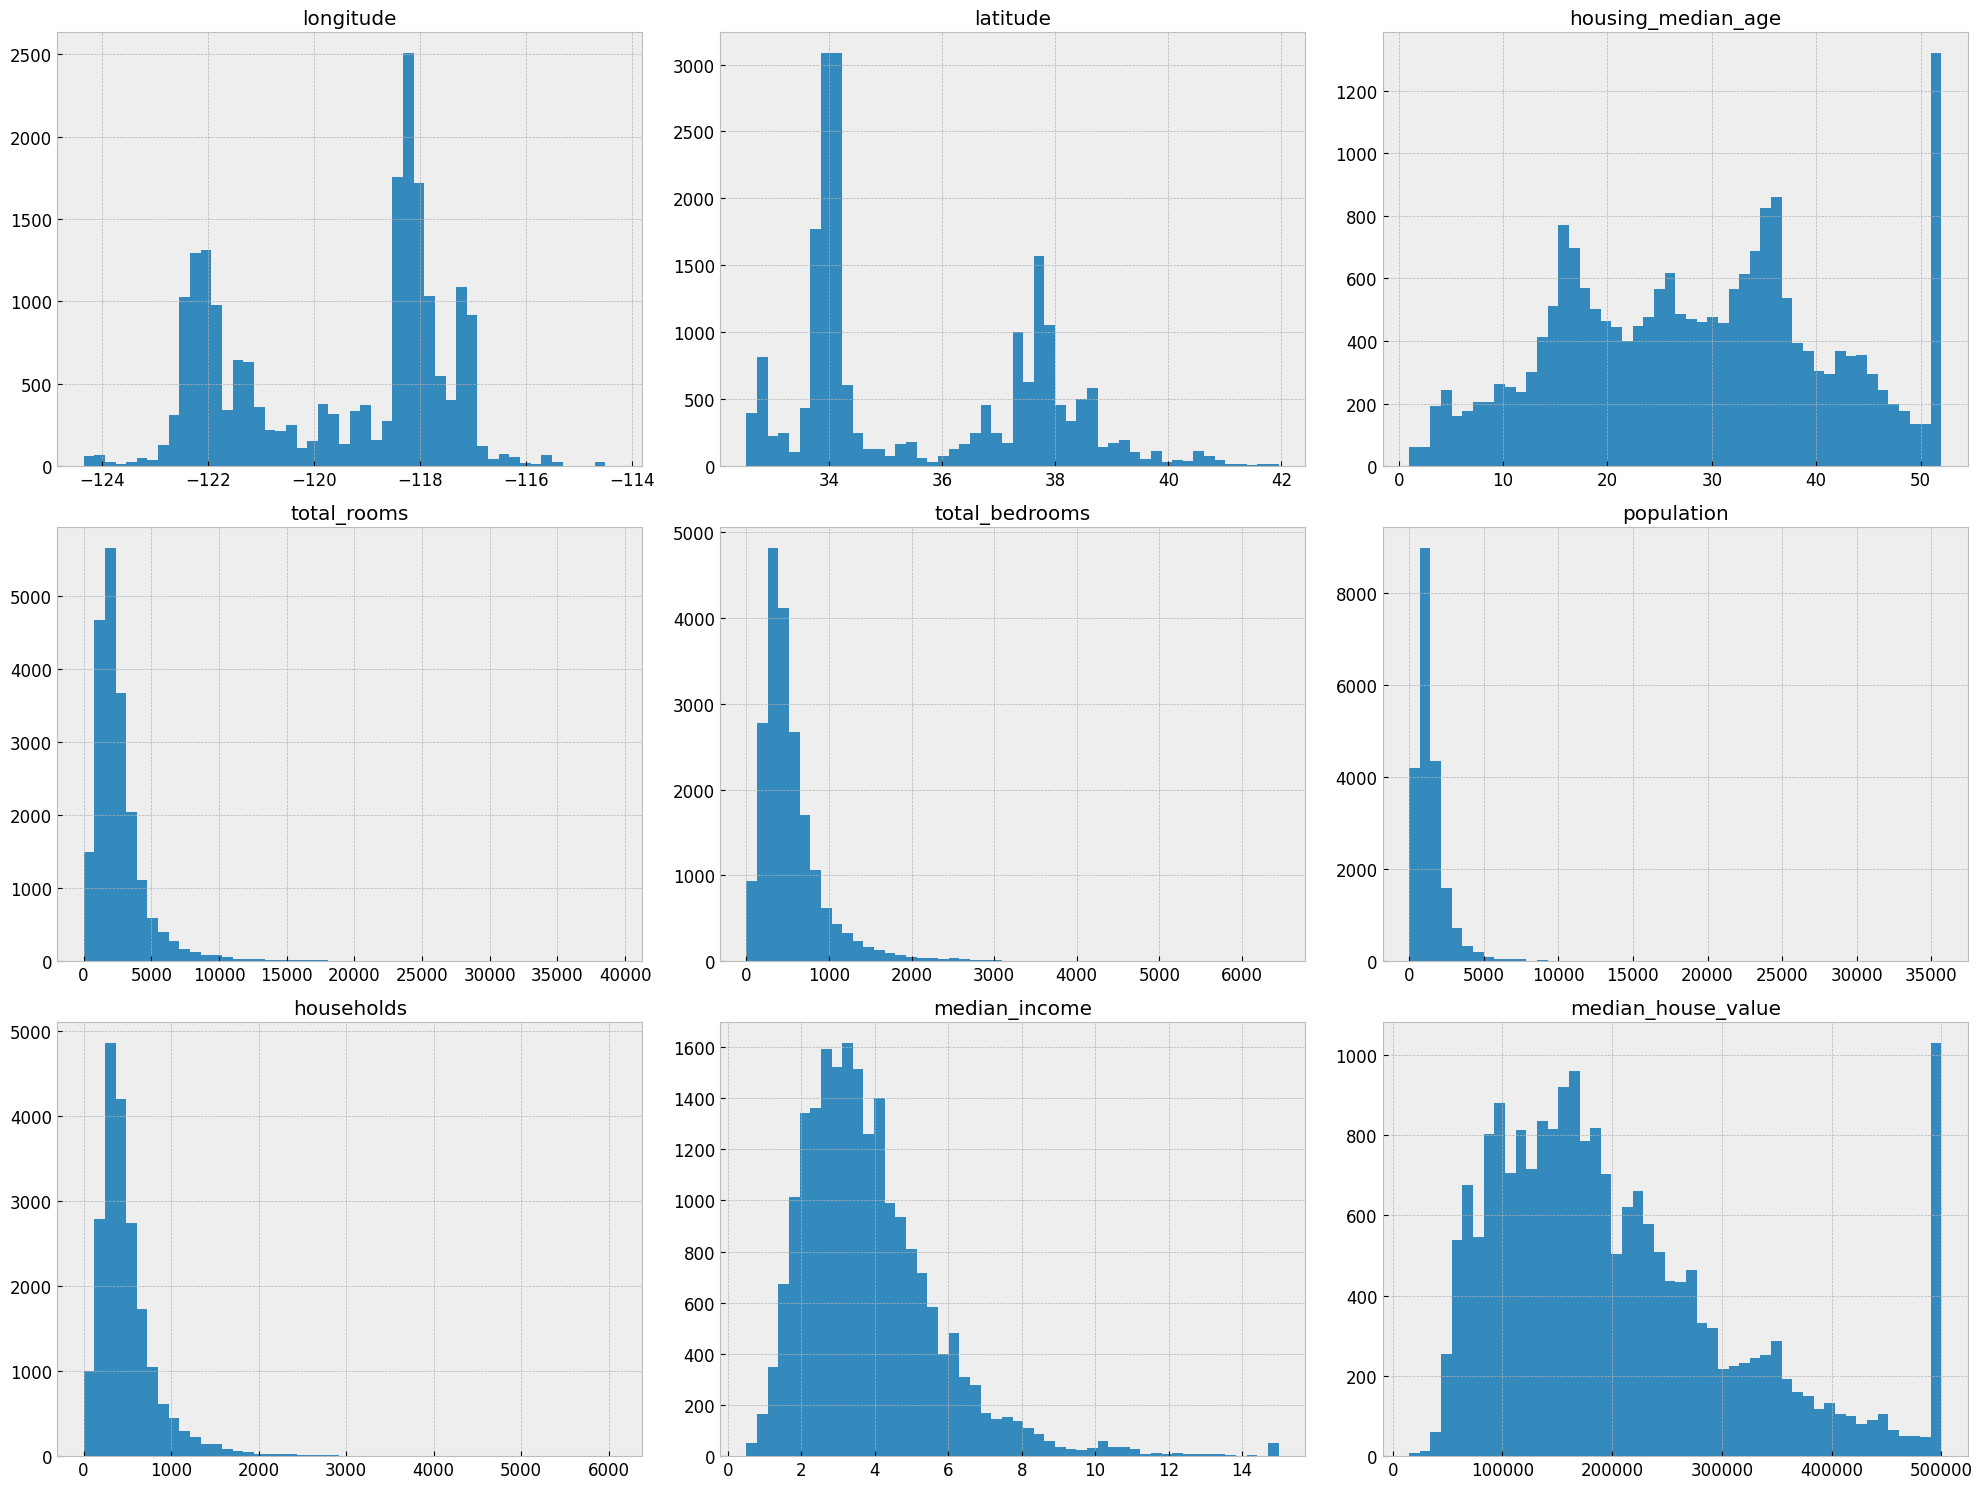

In [12]:
# 💻 Plot a histogram of all the data features( with a bin size of 50)

housing.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

#### 5.2: Visualize the distribution of only one column
Plot the histogram for the `median_income` column. Use a bin size of 50 for the histogram

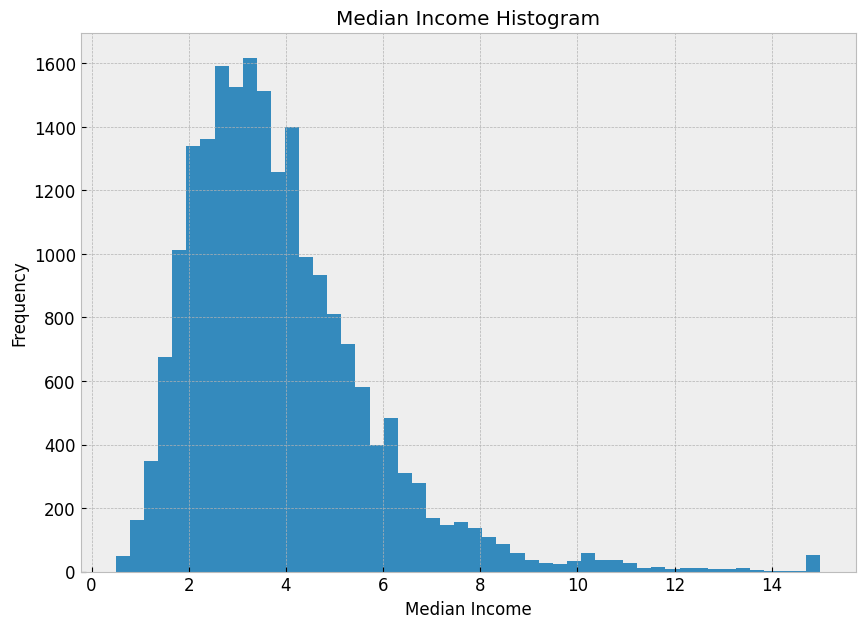

In [13]:
# 💻 plot a histogram of only the median_income

housing["median_income"].hist(bins=50, figsize=(10,7))
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.title("Median Income Histogram")
plt.show()

> 🚩 This is a good point to commit your code to your repository.

#### 5.3: Visualize the location of the houses using a scatter plot
In a single figure, plot a scatter plot of the `longitude` and `latitude` columns. 


Try this twice, once setting the `alpha` parameter to set the transparency of the points to 0.1, and once without setting the `alpha` parameter.

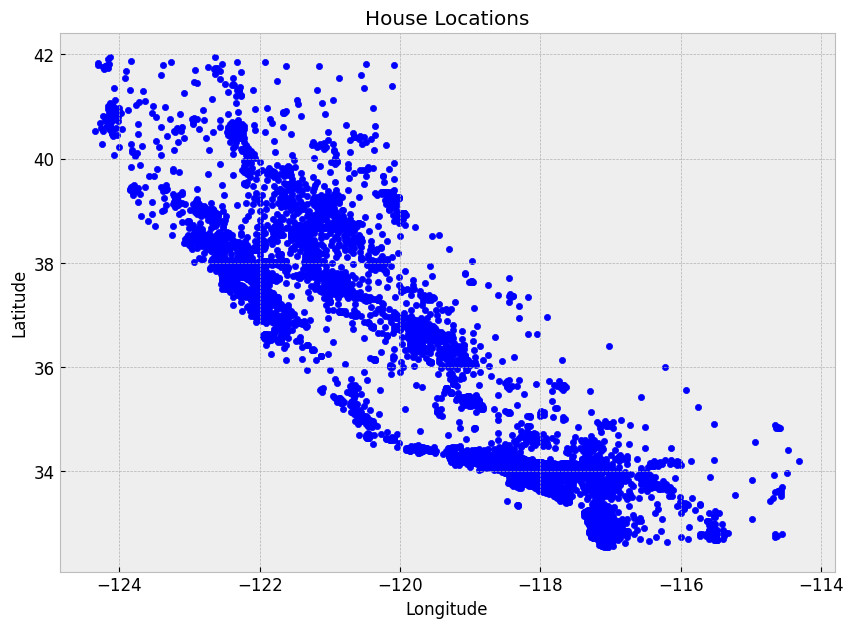

In [14]:
# 💻 scatter plat without alpha

housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Locations")
plt.show()

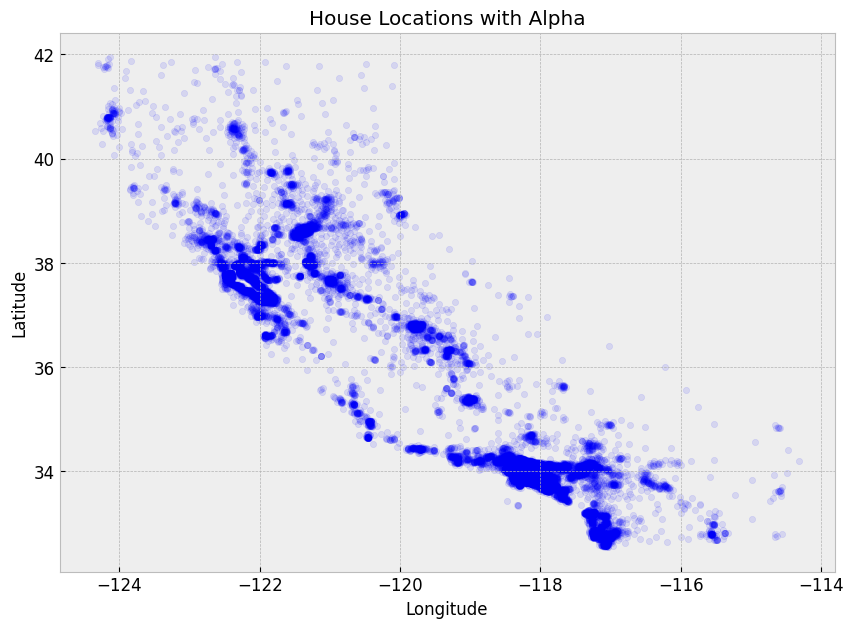

In [15]:
# 💻 scatter plat with alpha

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(10,7))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Locations with Alpha")
plt.show()

> 🚩 This is a good point to commit your code to your repository.

💯✨ For 3 Extra Credit points; Use the Plotly express to plot the scatter plot on a map of california

(📜 Check out the examples on their docs)[https://plotly.com/python/scatter-plots-on-maps/]

In [24]:
# 💻💯✨ Plot the data on a map of California

import plotly.express as px

fig = px.scatter_mapbox(housing, 
                        lat="latitude", 
                        lon="longitude", 
                        size = "population", 
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=5,
                        mapbox_style="carto-positron", 
                        title="Housing Locations in California")

fig.show()
                        

C:\Users\fakhr\AppData\Local\Temp\ipykernel_25656\4043752429.py:5: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(housing,


> 🚩 This is a good point to commit your code to your repository.

### Task 6: Explore the data and find correlations

#### 6.1: Generate a correlation matrix for the numerical columns

In [17]:
# 💻 Get the correlation matrix of the housing data excluding the 'ocean_proximity' column

corr_matrix = housing.drop('ocean_proximity', axis=1).corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

#### 6.2: Get the Correlation data fro the `median_house_age` column
sort the results in descending order

In [18]:
# 💻 Get the correlation data for just the median_house_age

corr_matrix["median_house_value"].sort_values(ascending=False)
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

#### 6.2: Visualize the correlation matrix using a heatmap
- use the coolwarm color map
- show the numbers on the heatmap


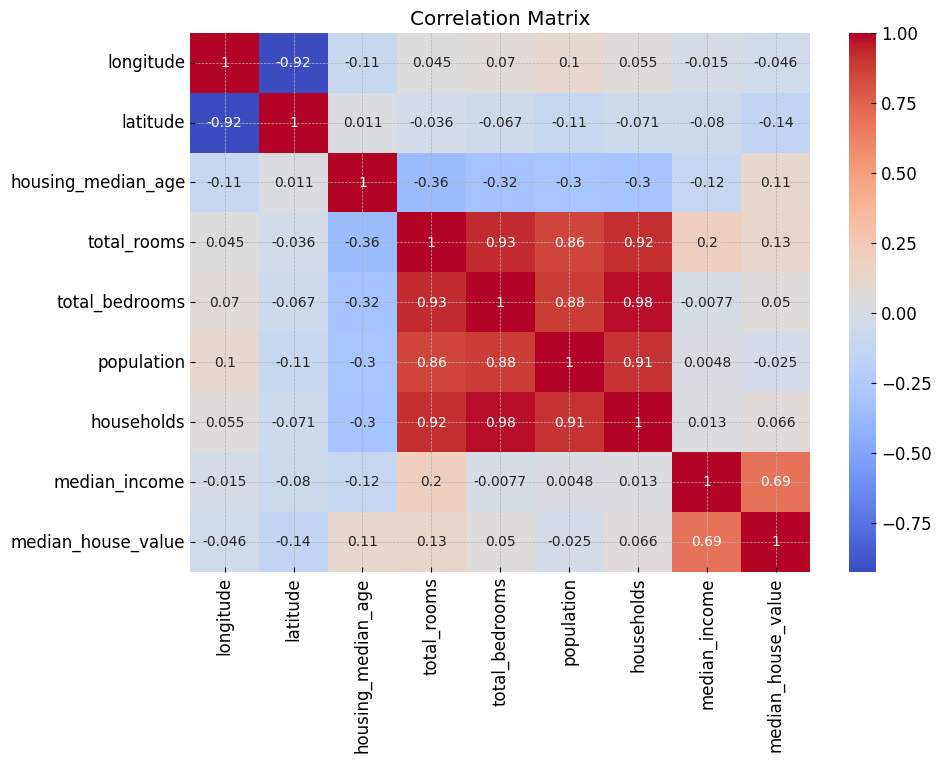

In [19]:
# 💻 Plot the correlation matrix as a heatmap

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### 6.3: Visualize the correlations between some of the features using a scatter matrix
- Plot a scatter matrix for the `total_rooms`, `median_house_age`, `median_income`, and `median_house_value` columns

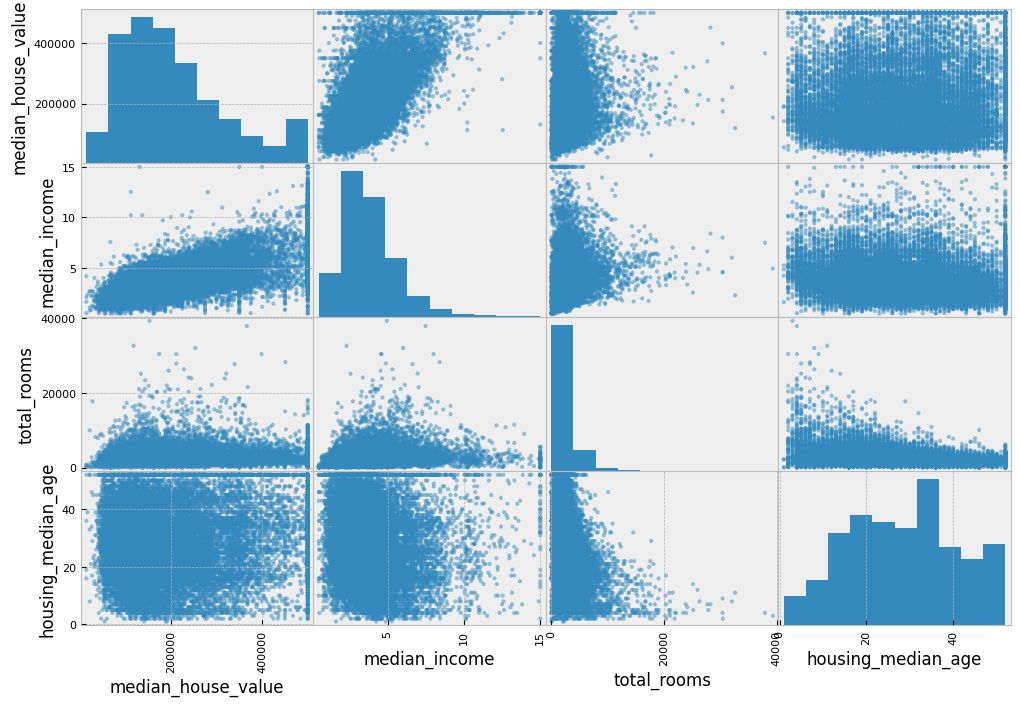

In [20]:
# 💻 using Pandas Scatter Matrix Plotting, Plot the scatter matrix for (median_house_value, median_income, total_rooms, housing_median_age)

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

#### 6.4: Visualize the correlations between 2 features using a scatter plot
- use an `alpha` value of 0.1

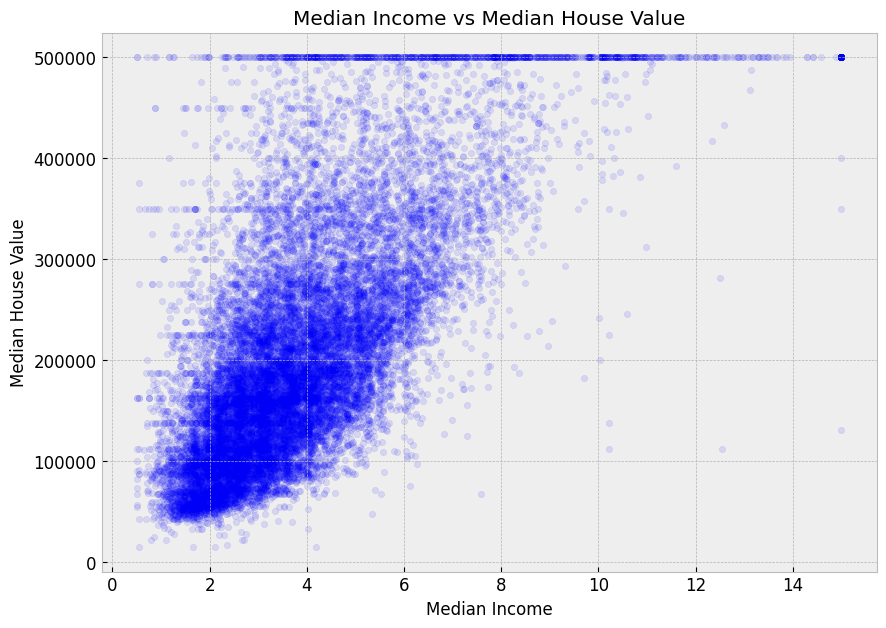

In [21]:
# 💻 Plot the scatter plot for just (median_income and median_house_value)

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(10,7))
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.show()

#### 6.5: ❓ What do you notice about the chart? what could that mean?
What could the lines of values at the top of the chart mean here?

> 🚩 This is a good point to commit your code to your repository.

### Task 7: Data Cleaning - Duplicate Data

#### 7.1: Find duplicate data

In [22]:
# 💻 Identify the duplicate data in the dataset

duplicates = housing.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool


### Task 8: Data Cleaning - Missing Data

#### 8.1: Find missing data

In [25]:
# 💻 Identify the missing data in the dataset

missing = housing.isnull().sum()
print(missing)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


#### 8.2: show a sample of 5 records of the rows with missing data
Notice there are 2 keywords here: `sample` and (rows with missing data)

<details>
  <summary>🦉 Hints:</summary>

  * You'll do pandas filtering here
  * You'll need to use the `isna()` or `isnull()` method on the 1 feature with missing data. to find the rows with missing data
  * you'll need to use the `sample()` method to get a sample of 5 records of the results
</details>

In [27]:
# 💻 use Pandas Filtering to show all the records with missing `total_bedrooms` field

missing_bedrooms = housing[housing["total_bedrooms"].isnull()]
sample_missing_bedrooms = missing_bedrooms.sample(5)
print(sample_missing_bedrooms)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16330    -121.33     38.02                31.0       1466.0             NaN   
17198    -119.75     34.45                 6.0       2864.0             NaN   
18873    -122.22     38.08                37.0       2811.0             NaN   
6541     -118.05     34.04                33.0       1348.0             NaN   
17639    -121.90     37.28                26.0       3756.0             NaN   

       population  households  median_income  median_house_value  \
16330       608.0       254.0         3.1827            162100.0   
17198      1404.0       603.0         5.5073            263800.0   
18873      1574.0       516.0         3.1053             96700.0   
6541       1098.0       257.0         4.2917            161200.0   
17639      1408.0       535.0         5.6427            320000.0   

      ocean_proximity  
16330          INLAND  
17198      NEAR OCEAN  
18873        NEAR BAY  
6541        <1H OCEA

#### 8.3: Calculate the central tendency values of the missing data feature
* Calculate the mean, median, trimmed mean

In [28]:
from scipy import stats

# 💻 get the mean, median and trimmed mean of the total_bedrooms column
# Median
total_bedrooms_median = housing["total_bedrooms"].median()

# Mean
total_berooms_mean = housing["total_bedrooms"].mean()

# Trimmed Mean
total_bedrooms_trimmed_mean = stats.trim_mean(housing["total_bedrooms"].dropna(), proportiontocut=0.1)

print(f"Median: {total_bedrooms_median}")
print(f"Mean: {total_berooms_mean}")
print(f"Trimmed Mean: {total_bedrooms_trimmed_mean}")

Median: 435.0
Mean: 537.8705525375618
Trimmed Mean: 471.43818437633814


#### 8.4: Visualize the distribution of the missing data feature
* Plot a histogram of the missing data feature (total_bedrooms)

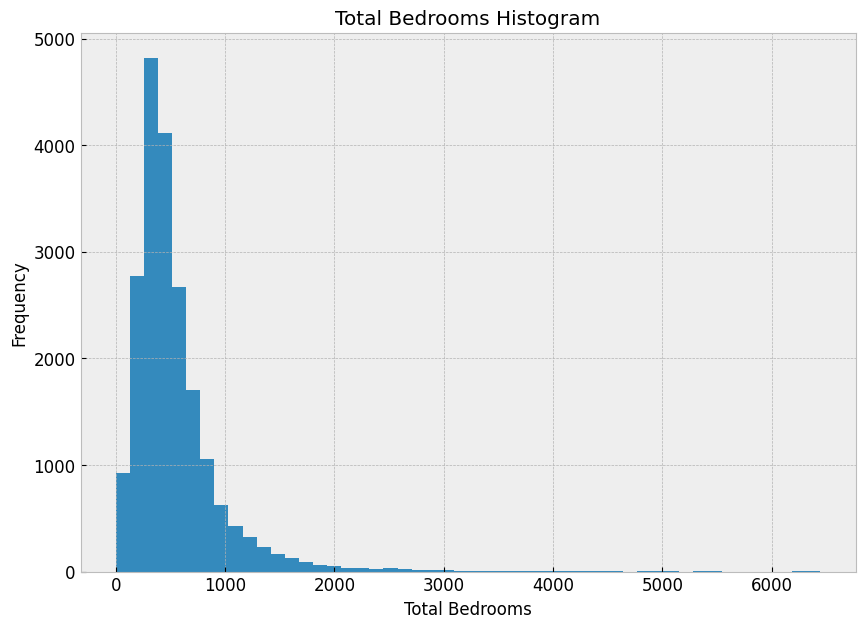

In [29]:
# 💻 Plot the histogram of the total_bedrooms column

housing["total_bedrooms"].hist(bins=50, figsize=(10,7))
plt.xlabel("Total Bedrooms")
plt.ylabel("Frequency")
plt.title("Total Bedrooms Histogram")
plt.show()

#### 8.5: Choose one of the central tendency values and use it to fill in the missing data
* Justify your choice
* Don't use the `inplace` parameter, instead, create a new dataframe with the updated values. (this is a bit challenging)
* show the first 5 records of the new dataframe to confirm we got the full dataframe

[📜 You should find a good example here](https://www.sharpsightlabs.com/blog/pandas-fillna/#example-2)

In [31]:
# 💻 Fill the missing values in the total_bedrooms column with an appropriate value, then show the first 5 records of the new dataframe

housing_filled = housing.copy()
housing_filled["total_bedrooms"].fillna(total_bedrooms_median, inplace=False)

print(housing_filled.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


❓ Why did you choose this value?

#### 8.6: Confirm that there are no more missing values in the new dataframe
* make sure the dataframe contains all features, not just the `total_bedrooms` feature

In [33]:
# 💻 Confirm the new dataframe has no missing values

missing_filled = housing_filled.isna().sum()
print(missing_filled)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


#### 8.7: Dropping the missing data
assume we didn't want to impute the missing data, and instead, we wanted to drop the rows with missing data.
* don't use the `inplace` parameter, instead, create a new dataframe with the updated values.

In [35]:
# 💻 drop the missing rows of the total_bedroom and save it to a new dataframe

housing_dropped = housing.dropna(subset=["total_bedrooms"])
print(housing_dropped.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


#### 8.8: Confirm that there are no more missing values in the new dataframe
* make sure the dataframe contains all features, not just the `total_bedrooms` feature

In [36]:
# 💻 Confirm the new dataframe has no missing values

missing_dropped = housing_dropped.isna().sum()
print(missing_dropped)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


> 🚩 This is a good point to commit your code to your repository.

## Wrap up
Remember to update the self reflection and self evaluations on the `README` file.

Make sure you run the following cell; this converts this Jupyter notebook to a Python script. and will make the process of reviewing your code on GitHub easier

In [28]:
# 🦉: The following command converts this Jupyter notebook to a Python script.
!jupyter nbconvert --to python notebook.ipynb

[NbConvertApp] Converting notebook notebook.ipynb to python
[NbConvertApp] Writing 10275 bytes to notebook.py


> 🚩 **Make sure** you save the notebook and make one final commit here